In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jangedoo/utkface-new")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import os
import glob

In [19]:
dataset = os.listdir(path + "/UTKFace")

In [20]:
labels=[]
images=[]
for image in dataset:
  try:
    label = image.split("_")[0]
    img = cv2.imread(path + "/UTKFace/" + image, cv2.COLOR_BGR2RGB)
  except:
    pass
  img = cv2.resize(img, (128, 128))
  images.append(img)
  labels.append(int(label))

In [21]:
X=np.array(images)
y=np.array(labels)

In [22]:
X.shape

(23708, 128, 128, 3)

In [23]:
type(labels[0])

int

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [25]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=2,activation='relu', padding='Same', input_shape = (128,128,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=2,activation='relu', padding='Same'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,786,401 (64.04 MB)

 Trainable params: 16,786,401 (64.04 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stopping=EarlyStopping(
    monitor="val_loss",
    patience=2,
    verbose=0,
    restore_best_weights=True,
)

In [28]:
%%time
history= model.fit(X_train,y_train,
                   validation_split=0.2,
                   epochs=7,
                   callbacks=[early_stopping])

Epoch 1/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - loss: 1580248.3750 - mae: 311.1728 - val_loss: 1501.5303 - val_mae: 33.4323
Epoch 2/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 1495.3931 - mae: 33.1903 - val_loss: 1498.5139 - val_mae: 33.3871
Epoch 3/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 1495.0947 - mae: 33.1653 - val_loss: 1494.0829 - val_mae: 33.3207
Epoch 4/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 1508.5891 - mae: 33.3147 - val_loss: 1488.0948 - val_mae: 33.2307
Epoch 5/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 1511.2960 - mae: 33.3147 - val_loss: 1480.3258 - val_mae: 33.1136
Epoch 6/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 1480.0719 - mae: 32.9237 - val_loss: 1470.5177 - val_mae: 32.9652
Epoch 7/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 1494.0776 - mae: 33.0380 - val_loss: 1458.4161 - val_mae: 32.7812
CPU times: user 1min, sys: 3.64 s, total: 1min 4s
Wall time: 1min 12s


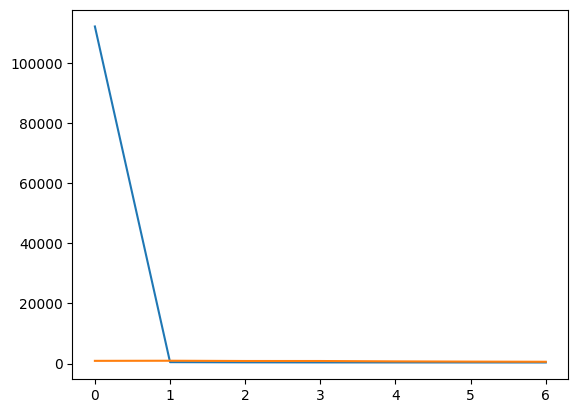

In [14]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.show()

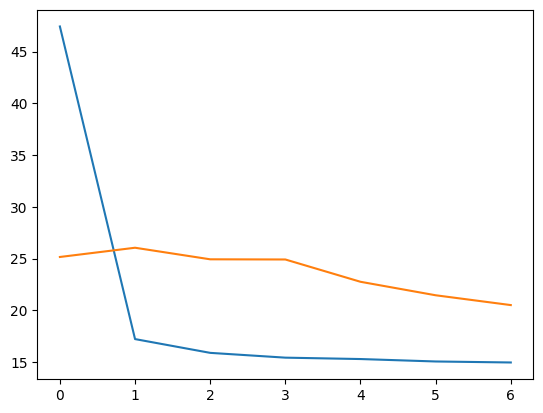

In [15]:
plt.plot(history.history['mae'],label='train')
plt.plot(history.history['val_mae'],label='validation')
plt.show()

In [16]:
test_scores = model.evaluate(X_test,y_test)
test_scores

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 613.7715 - mae: 20.1325


[614.2257690429688, 20.184688568115234]

In [29]:
categories = []

for i in labels:
  if i < 12:
    categories.append("Kid")
  elif i < 19 and i > 12:
    categories.append("Teenager")
  elif i < 50 and i > 19:
    categories.append("Adult")
  else:
    categories.append("Old")

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(categories)

In [30]:
Label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label mapping:", Label_mapping)

Label mapping: {'Adult': 0, 'Kid': 1, 'Old': 2, 'Teenager': 3}


In [31]:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X, labels_encoded, test_size=0.2, random_state=42, shuffle = True)

In [32]:
model2=Sequential()

model2.add(Conv2D(filters=32,kernel_size=2,activation='relu', padding='Same', input_shape = (128,128,3)))
model2.add(MaxPooling2D())
model2.add(Dropout(0.25))
model2.add(Conv2D(filters=64,kernel_size=2,activation='relu', padding='Same'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(4, activation='softmax'))

In [33]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,787,172 (64.04 MB)

 Trainable params: 16,787,172 (64.04 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping=EarlyStopping(
    monitor="val_loss",
    patience=2,
    verbose=0,
    restore_best_weights=True,
)

In [35]:
%%time
history_cat = model2.fit(X_cat_train,y_cat_train,
                   validation_split=0.2,
                   epochs=7,
                   callbacks=[early_stopping])

Epoch 1/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5148 - loss: 396.6250 - val_accuracy: 0.6075 - val_loss: 1.2340
Epoch 2/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6191 - loss: 0.9914 - val_accuracy: 0.6270 - val_loss: 1.1336
Epoch 3/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6421 - loss: 0.9250 - val_accuracy: 0.6473 - val_loss: 1.0087
Epoch 4/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6684 - loss: 0.8687 - val_accuracy: 0.6537 - val_loss: 0.9391
Epoch 5/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6846 - loss: 0.8279 - val_accuracy: 0.6505 - val_loss: 0.9179
Epoch 6/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6961 - loss: 0.7829 - val_accuracy: 0.6719 - val_loss: 0.8660
Epoch 7/7
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6921 - loss: 0.7879 - val_accuracy: 0.6921 - val_loss: 0.8380
CPU times: user 1min, sys: 3.31 s, total: 1min 3s
Wall time: 1min 14s


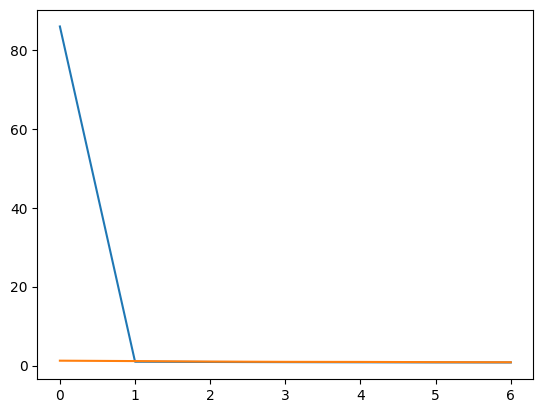

In [36]:
plt.plot(history_cat.history['loss'],label='train')
plt.plot(history_cat.history['val_loss'],label='validation')
plt.show()